# Maximum Likelihood

In [14]:
import numpy as np
import pandas as pd
#from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.optimize import minimize

In [15]:
# --->>> Your Turn <<<---
# change the data generation to create a quadratic function
# what else do you have to change then?

# --> points where adjustments were made are highlighted

In [16]:
# Generate some synthetic data

# first that independent variable
x = np.linspace(-10, 30, 100)

# generate a normally distributed noise
e = np.random.normal(0, 5, 100)

# generate ground truth --> Quadratic this time
y = 10 + 4*x**2 + e
# y = 10 + 4*x + e

# put data into a dataframe
df = pd.DataFrame({'x':x, 'y':y})
df.head()

,x,y
0,-10.000000,409.954063
1,-9.595960,392.089802
2,-9.191919,356.833442
3,-8.787879,316.094336
4,-8.383838,290.425855


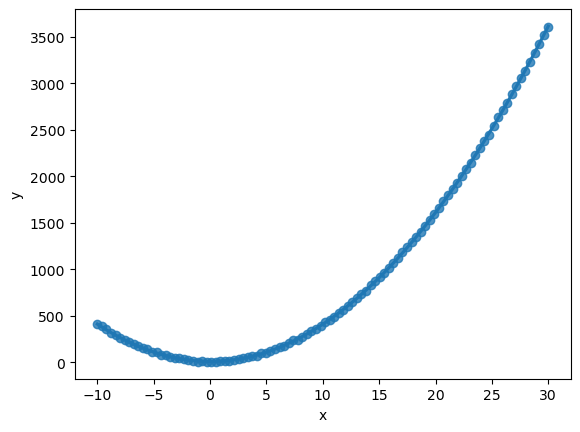

In [17]:
# Visualize the synthetic data on Seaborn’s regression plot.
# --> added order = 2 for quadratic function
sns.regplot(x='x', y='y', data = df, order=2);

In [23]:
# Calculate the OLS fit (ordinary least squares)
# for quadratic functions we need to add x^2 as feature
df['x2'] = df.x**2
# we fit both features
from statsmodels import api
features = api.add_constant(df.x)
features = api.add_constant(df.x2)
model = api.OLS(y, features).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.855e+06
Date:                Tue, 25 Nov 2025   Prob (F-statistic):          5.72e-227
Time:                        17:25:40   Log-Likelihood:                -308.79
No. Observations:                 100   AIC:                             621.6
Df Residuals:                      98   BIC:                             626.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.6126      0.720     14.737      0.000       9.184      12.042
x2             4.0007      0.002   1963.507      0.000       3.997       4.005
==============================================================================
Omnibus:                        2.857   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.240   Jarque-Bera (JB):                2.216
Skew:                           0.317   Prob(JB):                        0.330
Kurtosis:                       3.361   Cond. No.                         475.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# Now do Maximum Likelihood Estimation

# ml modeling and neg LL calculation
def MLE_Norm_quadratic(parameters):

    # extract parameters
    const, beta, std_dev = parameters

    # predict the output
    # --> adjusted for quadratic
    pred = const + beta*x**2

    # Calculate the log-likelihood for normal distribution
    LL = np.sum(stats.norm.logpdf(y, loc=pred, scale=std_dev))
    # return probability to observe y for a normal model with mu=pred and std=std_dev
    # see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

    # Calculate the negative log-likelihood
    neg_LL = -1*LL
    return neg_LL

In [27]:
# Minimize the negative log-likelihood of the generated data
# using the minimize method from SciPy’s optimize module.

# minimize arguments: function, intial_guess_of_parameters, method
# --> adjusted for quadratic
mle_model = minimize(MLE_Norm_quadratic, np.array([2,2,2]), method='L-BFGS-B')

# What this does is execute the given function several times
# and return the parameters for which the given function returned the smallest value.

# documentation:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

mle_model

  message: CONVERGENCE: RELATIVE REDUCTION OF F <= FACTR*EPSMCH
  success: True
   status: 0
      fun: 308.78585641228835
        x: [ 1.061e+01  4.001e+00  5.306e+00]
      nit: 38
      jac: [ 0.000e+00  1.012e-03  1.705e-05]
     nfev: 164
     njev: 41
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>